## Financial Data Analysis CSV

### Objectives

Master the skills required to load, manipulate, analyze, and export CSV data within a Jupyter Notebook environment.

#### 1. **Loading CSV Data into Jupyter**:
- Use Python's built-in csv module to read data.
- Load the CSV data into a DataFrame using the `pandas` library.
- Display the first few rows of the dataset to understand its structure.

#### 2. **Basic Data Exploration**:
- Determine the number of rows and columns in the dataset.
- Identify and handle missing values in the dataset.
- Obtain summary statistics for numerical columns.

#### 3. **Data Manipulation and Cleaning**:
- Filter clients based on specific financial criteria.
- Modify existing columns, if necessary, to derive new metrics.
- Identify and handle duplicate client entries.

#### 4. **Data Analysis with CSV Data**:
- Group clients by financial advisors and calculate aggregate metrics.
- Identify clients with the highest and lowest profits.
- Analyze the distribution of clients across different profit ranges.

#### 5. **Visualization with CSV Data**:
- Plot a bar chart showing the profit distribution across clients.
- Visualize the distribution of clients among different financial advisors using a pie chart.

#### 6. **Advanced Analysis**:
- Analyze correlations between different financial metrics, such as budget allocation and actual profit.
- Predict future profits based on historical data using basic regression techniques.

#### 7. **Exporting Data to Excel**:  
- Save the manipulated and analyzed data back to an Excel file.
- Export subsets of data to the same Excel file.


#### Step 1.1: Use Python's built-in csv module to read data.

In [1]:
import csv

# Open the CSV file for reading
with open('profitable_clients_sorted_from_json.csv', 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)

#### Step 1.2: Load CSV data using the pandas library.

In [2]:
import pandas as pd

# Load the CSV data into a DataFrame
df = pd.read_csv('profitable_clients_sorted_from_json.csv')

#### Step 1.3: Display the first few rows of the dataset to understand its structure.

In [3]:
# Display the first few rows of the DataFrame
df.head()

,ClientID,ClientName,Budget,Expenses,Revenue,Profit,FinancialAdvisor
0,112,Yellow Apple,90000,84500,93000,8500,Hank Yellow
1,111,Orange Mango,92000,84000,124000,40000,Frank Black
2,102,Beta Inc,75000,50000,90000,40000,Bob Smith
3,104,Delta Co,85000,70000,110000,40000,Dave Brown
4,110,Juliet Co,99000,94000,130000,36000,Jack Violet


### Step 2: Basic Data Exploration

#### Step 2.1: Determine the number of rows and columns in the dataset.

In [4]:
# Assuming you've already loaded your data into a DataFrame named 'df'
shape = df.shape
print(f"The dataset has {shape[0]} rows and {shape[1]} columns.")

The dataset has 89 rows and 7 columns.


#### Step 2.2: Identify and handle missing values in the dataset.

In [5]:
# Identify columns with missing values
missing_values = df.isnull().sum()
print("Number of missing values for each column:")
print(missing_values)

# Handle missing values
# For this dataset, we'll calculate the Profit as (Revenue - Expenses) for the missing values.
df['Profit'].fillna(df['Revenue'] - df['Expenses'], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())



Number of missing values for each column:
ClientID            0
ClientName          0
Budget              0
Expenses            0
Revenue             0
Profit              0
FinancialAdvisor    0
dtype: int64

Missing values after handling:
ClientID            0
ClientName          0
Budget              0
Expenses            0
Revenue             0
Profit              0
FinancialAdvisor    0
dtype: int64


#### Step 2.3: Obtain summary statistics for numerical columns.

In [6]:
# Obtain summary statistics and round to 2 decimal places
summary_statistics = df.describe().round(1)
print("\nSummary statistics for numerical columns:\n")
print(summary_statistics)



Summary statistics for numerical columns:

       ClientID    Budget  Expenses   Revenue   Profit
count      89.0      89.0      89.0      89.0     89.0
mean      147.1   81528.1   77380.3  103584.3  26155.6
std        31.3   14022.8   16453.6   21799.1  12068.1
min       101.0    9000.0     850.0    5000.0 -35000.0
25%       123.0   76000.0   71000.0   96000.0  25000.0
50%       145.0   85000.0   80000.0  103000.0  25000.0
75%       167.0   91000.0   86000.0  113000.0  30000.0
max       291.0  105000.0  150000.0  220000.0  70000.0


### Step 3: Data Manipulation and Cleaning

#### Step 3.1: Filter clients based on specific financial criteria

In [7]:
# Filter clients where expenses exceeded the budget
over_budget_clients = df[df['Expenses'] > df['Budget']]
print("\nClients with expenses exceeding their budget:")
print(over_budget_clients)



Clients with expenses exceeding their budget:
    ClientID           ClientName  Budget  Expenses  Revenue  Profit  \
5        101            Acme Corp   50000     90000    55000  -35000   
8        106  Foxtrot Enterprises   70000    105000   140000   35000   
14       206      CR7 Enterprises   63000    150000   220000   70000   
15       201              Ace Inc   30000     70000    38000  -32000   

   FinancialAdvisor  
5     Alice Johnson  
8       Frank Black  
14        Bob Smith  
15    Alice Johnson  


#### Step 3.2: Modify existing columns to derive new metrics

In [8]:
# Calculate profit margin and add it as a new column
df['ProfitMargin'] = (df['Profit'] / df['Revenue']).round(2)
print("\nData with added Profit Margin column:")
print(df[['ClientName', 'ProfitMargin']])



Data with added Profit Margin column:
            ClientName  ProfitMargin
0         Yellow Apple          0.09
1         Orange Mango          0.32
2             Beta Inc          0.44
3             Delta Co          0.36
4            Juliet Co          0.28
..                 ...           ...
84   Pogba Productions          0.32
85  Griezmann Graphics          0.23
86   Sterling Software          0.25
87     Kroos Creations          0.23
88       Coutinho Corp          0.26

[89 rows x 2 columns]


#### Step 3.3: Identify and handle duplicate client entries

In [9]:
# Identify duplicate client entries based on ClientID
duplicates = df[df.duplicated(subset='ClientID', keep='first')]
print("\nDuplicate client entries:")
print(duplicates)

# If you decide to drop duplicates:
df = df.drop_duplicates(subset='ClientID', keep='first')
print("\nData after removing duplicates:")
print(df)



Duplicate client entries:
Empty DataFrame
Columns: [ClientID, ClientName, Budget, Expenses, Revenue, Profit, FinancialAdvisor, ProfitMargin]
Index: []

Data after removing duplicates:
    ClientID          ClientName  Budget  Expenses  Revenue  Profit  \
0        112        Yellow Apple   90000     84500    93000    8500   
1        111        Orange Mango   92000     84000   124000   40000   
2        102            Beta Inc   75000     50000    90000   40000   
3        104            Delta Co   85000     70000   110000   40000   
4        110           Juliet Co   99000     94000   130000   36000   
..       ...                 ...     ...       ...      ...     ...   
84       180   Pogba Productions   69000     64000    94000   30000   
85       181  Griezmann Graphics   87000     82000   107000   25000   
86       182   Sterling Software   79000     74000    99000   25000   
87       183     Kroos Creations   88000     83000   108000   25000   
88       184       Coutinho Corp  

### Step 4: Data Analysis with CSV Data

#### Step 4.1: Group clients by financial advisors and calculate aggregate metrics


In [10]:
# Group by financial advisors and calculate aggregate metrics
grouped_by_advisor = df.groupby('FinancialAdvisor').agg({
    'Budget': 'sum',
    'Expenses': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

print("\nAggregate metrics by Financial Advisor:")
print(grouped_by_advisor)



Aggregate metrics by Financial Advisor:
  FinancialAdvisor   Budget  Expenses  Revenue  Profit
0    Alice Johnson   779000    814000   973000  159000
1        Bob Smith   988000    935000  1347000  412000
2      Carol White   795000    730000  1001000  271000
3       Dave Brown   845000    780000  1068000  288000
4        Eve Green   864000    804000  1072000  268000
5      Frank Black   934000    911000  1217000  306000
6       Grace Blue    80000     75000   105000   30000
7      Hank Yellow  1029000    955850  1238000  277850
8          Ivy Red    95000     90000   125000   35000
9      Jack Violet   847000    792000  1073000  281000


#### Step 4.2: Identify clients with the highest and lowest profits

In [11]:
# Identify client with the highest profit
highest_profit_client = df.loc[df['Profit'].idxmax()]
print("\nClient with the highest profit:")
print(highest_profit_client)

# Identify client with the lowest profit
lowest_profit_client = df.loc[df['Profit'].idxmin()]
print("\nClient with the lowest profit:")
print(lowest_profit_client)



Client with the highest profit:
ClientID                        206
ClientName          CR7 Enterprises
Budget                        63000
Expenses                     150000
Revenue                      220000
Profit                        70000
FinancialAdvisor          Bob Smith
ProfitMargin                   0.32
Name: 14, dtype: object

Client with the lowest profit:
ClientID                      101
ClientName              Acme Corp
Budget                      50000
Expenses                    90000
Revenue                     55000
Profit                     -35000
FinancialAdvisor    Alice Johnson
ProfitMargin                -0.64
Name: 5, dtype: object


#### Step 4.3: Analyze the distribution of clients across different profit ranges

In [12]:
# Define profit ranges
bins = [0, 10000, 20000, 30000, 40000, 50000, float('inf')]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k+']

# Categorize clients into profit ranges
df['ProfitRange'] = pd.cut(df['Profit'], bins=bins, labels=labels, right=False)

# Count clients in each profit range
profit_distribution = df['ProfitRange'].value_counts().reset_index()
profit_distribution.columns = ['ProfitRange', 'ClientCount']

print("\nDistribution of clients across profit ranges:")
print(profit_distribution.sort_values(by='ProfitRange'))



Distribution of clients across profit ranges:
  ProfitRange  ClientCount
4       0-10k            2
5     10k-20k            0
0     20k-30k           56
1     30k-40k           23
2     40k-50k            3
3        50k+            2


### Step 5: Visualization with CSV Data

#### Step 5.1: Plot a bar chart showing the profit distribution across clients.

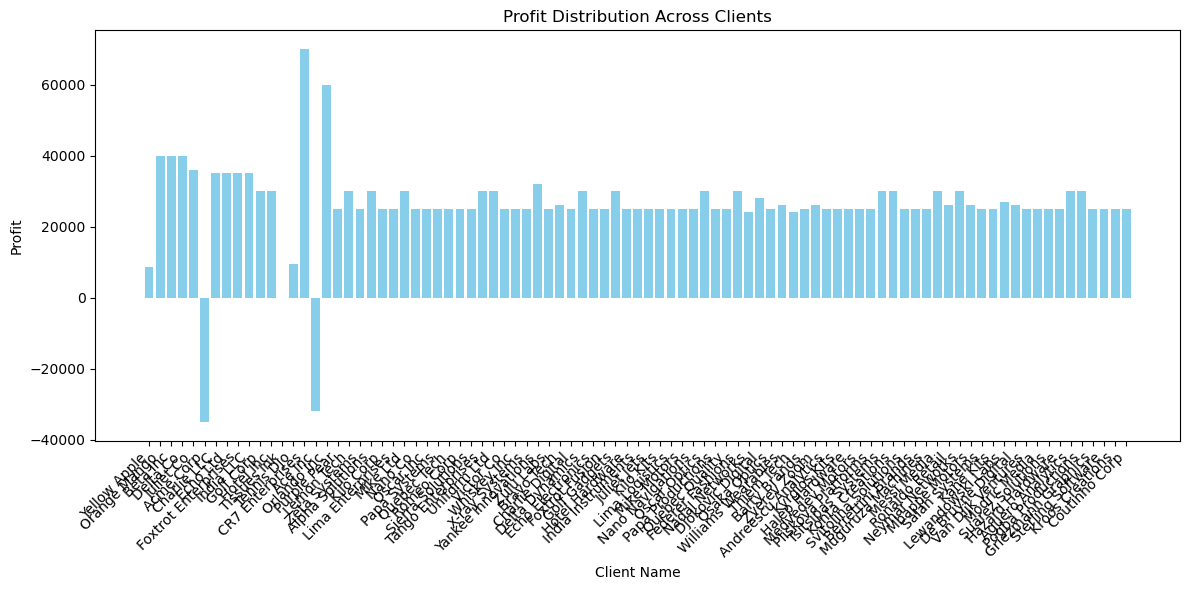

In [13]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the bar chart
plt.bar(df['ClientName'], df['Profit'], color='skyblue')

# Setting the title and labels
plt.title('Profit Distribution Across Clients')
plt.xlabel('Client Name')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')  # Rotate client names for better visibility

# Display the plot
plt.tight_layout()
plt.show()


#### Step 5.2: Visualize the distribution of clients among different financial advisors using a pie chart

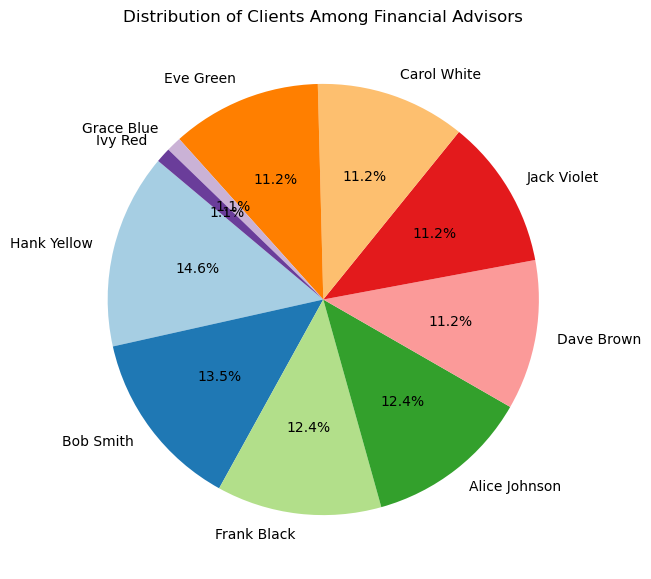

In [14]:
# Counting the number of clients for each financial advisor
advisor_counts = df['FinancialAdvisor'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(advisor_counts, labels=advisor_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Setting the title
plt.title('Distribution of Clients Among Financial Advisors')

# Display the plot
plt.show()


### Step 6: Visualization

#### Step 6.1: Analyze correlations between different financial metrics, such as budget allocation and actual profit.

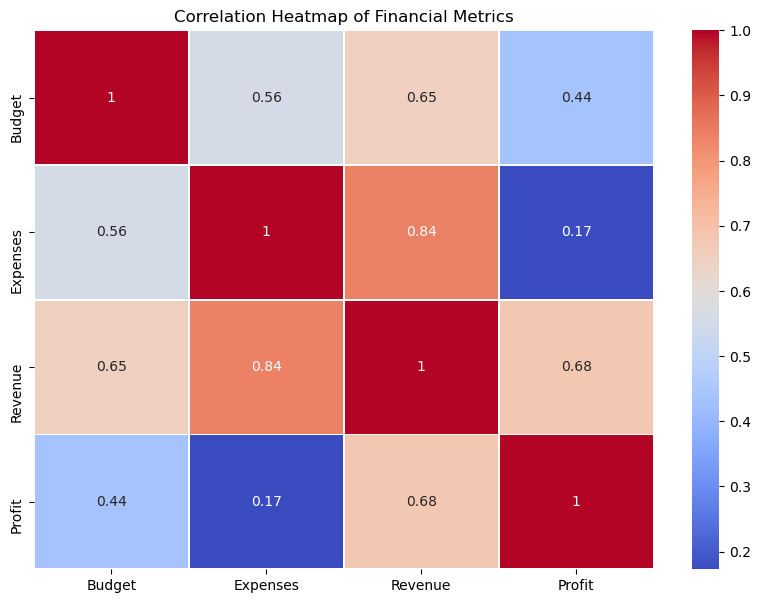

In [15]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['Budget', 'Expenses', 'Revenue', 'Profit']].corr()

# Plotting the heatmap for correlation
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()



#### Step 6.2:  Predict future profits based on historical data using basic regression techniques:


Mean Squared Error: 37614089.66


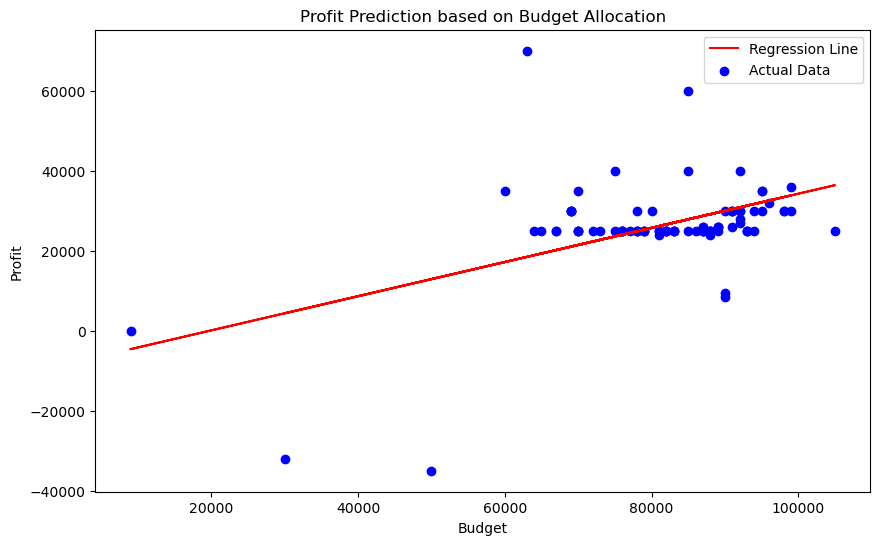

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Defining the features (X) and target variable (y)
X = df[['Budget']]
y = df['Profit']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Profit Prediction based on Budget Allocation')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.legend()
plt.show()


### Step 7: Advanced analysis

#### Step 7.1: Save the manipulated and analyzed data back to an Excel file

In [17]:
# Save the entire DataFrame to a new Excel file
df.to_excel('updated_financial_data.xlsx', index=False, sheet_name='All Data')



#### Step 7.2: Export subsets of data to the same Excel file


In [18]:
# Extracting top clients based on profit
top_clients = df.nlargest(10, 'Profit')

# Save the subset to the same Excel file but in a different sheet
with pd.ExcelWriter('updated_financial_data.xlsx', engine='openpyxl', mode='a') as writer:
    top_clients.to_excel(writer, index=False, sheet_name='Top Clients')
